In [38]:
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [39]:

import sys
sys.path.append('../utils')
import functions

In [40]:
df = pd.read_csv('../data/local/raw/doesthedogdie.com.csv')
df.head()

,category_name,title,yes,no,yes_ratio
0,a dog dies,Movie_John Wick,1150,106,0.915605
1,a dog dies,Movie_Marley & Me,781,37,0.954768
2,a dog dies,Movie_Hereditary,680,67,0.910308
3,a dog dies,Movie_MEGAN,580,22,0.963455
4,a dog dies,TV Show_Game of Thrones,524,36,0.935714


In [41]:
functions.show_basic_info(df)


DataFrame Shape: (5910, 5)
Number of Rows: 5910
Number of Columns: 5

Data Types of Columns:
category_name     object
title             object
yes                int64
no                 int64
yes_ratio        float64
dtype: object

Missing Values per Column:
category_name    0
title            0
yes              0
no               0
yes_ratio        0
dtype: int64

First 5 Rows of Data:
  category_name                    title   yes   no  yes_ratio
0    a dog dies          Movie_John Wick  1150  106   0.915605
1    a dog dies        Movie_Marley & Me   781   37   0.954768
2    a dog dies         Movie_Hereditary   680   67   0.910308
3    a dog dies              Movie_MEGAN   580   22   0.963455
4    a dog dies  TV Show_Game of Thrones   524   36   0.935714


Round to 3 decimals in 'yes_ratio'

In [42]:
df['yes_ratio'] = df['yes_ratio'].round(3)

Check if there are duplicate titles

In [43]:
duplicates = df[df['title'].duplicated()]

duplicate_count = df['title'].duplicated().sum()

print(f"Number of duplicates in 'title': {duplicate_count}")

Number of duplicates in 'title': 5176


### Check the categories in 'title' column

In [44]:
# Extract the unique values before the underscore in 'title'
unique_titles = df['title'].str.split('_').str[0].unique()

print(unique_titles)

['Movie' 'TV Show' 'Video Game' 'Anime' 'Book' 'YouTube' 'Podcast' 'Manga'
 'Blog' 'Short Story']


Extract media type and remove it from title column

In [45]:
df['media_type'] = df['title'].str.split('_').str[0]  # Extract media type
df['title'] = df['title'].str.split('_').str[1]       # Remove media type from title

df.head()

,category_name,title,yes,no,yes_ratio,media_type
0,a dog dies,John Wick,1150,106,0.916,Movie
1,a dog dies,Marley & Me,781,37,0.955,Movie
2,a dog dies,Hereditary,680,67,0.910,Movie
3,a dog dies,MEGAN,580,22,0.963,Movie
4,a dog dies,Game of Thrones,524,36,0.936,TV Show


In [46]:
print(df['media_type'].unique())

['Movie' 'TV Show' 'Video Game' 'Anime' 'Book' 'YouTube' 'Podcast' 'Manga'
 'Blog' 'Short Story']


#### Create new df with media_type 'Movie' only

In [47]:
doesthe_movies = df[df['media_type'] == 'Movie']
print(doesthe_movies)

             category_name                              title   yes   no  \
0               a dog dies                          John Wick  1150  106   
1               a dog dies                        Marley & Me   781   37   
2               a dog dies                         Hereditary   680   67   
3               a dog dies                              MEGAN   580   22   
5               a dog dies                       The Babadook   514   15   
...                    ...                                ...   ...  ...   
5898  there's gun violence                              Joker   104    2   
5901  there's gun violence                    American Psycho   101    0   
5906  there's gun violence  Everything Everywhere All at Once    92    2   
5907  there's gun violence                        Jojo Rabbit    92    0   
5909  there's gun violence                                Saw    91    1   

      yes_ratio media_type  
0         0.916      Movie  
1         0.955      Movie  


In [48]:
doesthe_movies.to_csv('../data/local/raw/doesthedog_movies.csv', index=False)

In [49]:
print(f'Unique titles in doesthe_movies: {doesthe_movies['title'].nunique()}')

Unique titles in doesthe_movies: 433


In [50]:
doesthe_movies['clean_title'] = functions.prepare_clean_titles(doesthe_movies, 'title')
doesthe_movies.head()


/tmp/ipykernel_50231/2012065974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doesthe_movies['clean_title'] = functions.prepare_clean_titles(doesthe_movies, 'title')


,category_name,title,yes,no,yes_ratio,media_type,clean_title
0,a dog dies,John Wick,1150,106,0.916,Movie,john wick
1,a dog dies,Marley & Me,781,37,0.955,Movie,marley me
2,a dog dies,Hereditary,680,67,0.910,Movie,hereditary
3,a dog dies,MEGAN,580,22,0.963,Movie,megan
5,a dog dies,The Babadook,514,15,0.972,Movie,the babadook


In [51]:
functions.show_basic_info(doesthe_movies)


DataFrame Shape: (2836, 7)
Number of Rows: 2836
Number of Columns: 7

Data Types of Columns:
category_name     object
title             object
yes                int64
no                 int64
yes_ratio        float64
media_type        object
clean_title       object
dtype: object

Missing Values per Column:
category_name    0
title            0
yes              0
no               0
yes_ratio        0
media_type       0
clean_title      0
dtype: int64

First 5 Rows of Data:
  category_name         title   yes   no  yes_ratio media_type   clean_title
0    a dog dies     John Wick  1150  106      0.916      Movie     john wick
1    a dog dies   Marley & Me   781   37      0.955      Movie    marley  me
2    a dog dies    Hereditary   680   67      0.910      Movie    hereditary
3    a dog dies         MEGAN   580   22      0.963      Movie         megan
5    a dog dies  The Babadook   514   15      0.972      Movie  the babadook


Drop media_type column

In [52]:
doesthe_movies.drop(columns=['media_type'], inplace=True)

/tmp/ipykernel_50231/2280681998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doesthe_movies.drop(columns=['media_type'], inplace=True)


#### Extract category_name unique values

In [53]:
unique_values = sorted(doesthe_movies['category_name'].dropna().unique())
print(f'Unique values in category column: {unique_values}')

Unique values in category column: ["A child's dear toy is destroyed", 'Autism specific abuse', 'D.I.D. Misrepresentation', 'Santa (et al) is spoiled', 'Someone attempts suicide', 'Someone becomes unconscious', "There's audio gore", 'a baby cries', 'a baby is stillborn', 'a car crashes', 'a car honks or tires screech', 'a cat dies', 'a child is abandoned by a parent or guardian', 'a dog dies', 'a dragon dies', 'a family member dies', 'a horse dies', 'a kid dies', 'a major character dies', 'a male character is ridiculed for crying', 'a mentally ill person is violent', 'a minor is sexualized', 'a minority is misrepresented', 'a non-human character dies', 'a parent dies', 'a person is hit by a car', 'a pet dies', 'a plane crashes', 'a pregnant person dies', 'a priceless artifact is destroyed', 'a trans person is depicted predatorily', 'a woman gets slapped', 'a woman is brutalized for spectacle', 'alcohol abuse', 'an LGBT person dies', 'an LGBT+ person is outed', 'an animal dies', 'an anim

In [54]:
print(f'Unique titles in doesthe_movies: {doesthe_movies['title'].nunique()}')

Unique titles in doesthe_movies: 433


### Drop rows where 'yes' is greater than 'no'
Keep rows where sensitive content does take place.

In [55]:
events_df = doesthe_movies.copy()
events_df = events_df[events_df['yes'] >= events_df['no']]

Group categories in new column

In [56]:
events_df['events'] = events_df.groupby('clean_title')['category_name'].transform(lambda x: ', '.join(x))
events_df = events_df.drop(columns=['category_name'])

In [57]:
events_df.head(10)

,title,yes,no,yes_ratio,clean_title,events
0,John Wick,1150,106,0.916,john wick,"a dog dies, there's a dead animal, a pet dies,..."
1,Marley & Me,781,37,0.955,marley me,"a dog dies, a pet dies, an animal is sad, some..."
2,Hereditary,680,67,0.910,hereditary,"a dog dies, there's a dead animal, there are b..."
3,MEGAN,580,22,0.963,megan,"a dog dies, there's a dead animal, there are b..."
5,The Babadook,514,15,0.972,the babadook,"a dog dies, there are bugs, a pet dies, animal..."
6,A Dog's Purpose,440,20,0.957,a dogs purpose,"a dog dies, a cat dies"
7,I Am Legend,434,13,0.971,i am legend,"a dog dies, there's dog fighting"
8,The Conjuring,434,14,0.969,the conjuring,"a dog dies, a pet dies, an animal dies, there ..."
10,American Psycho,378,16,0.959,american psycho,"a dog dies, there's a dead animal, a pet dies,..."
13,The Witch,301,8,0.974,the witch,"a dog dies, a kid dies, an infant is abducted"


In [58]:
events_df

,title,yes,no,yes_ratio,clean_title,events
0,John Wick,1150,106,0.916,john wick,"a dog dies, there's a dead animal, a pet dies,..."
1,Marley & Me,781,37,0.955,marley me,"a dog dies, a pet dies, an animal is sad, some..."
2,Hereditary,680,67,0.910,hereditary,"a dog dies, there's a dead animal, there are b..."
3,MEGAN,580,22,0.963,megan,"a dog dies, there's a dead animal, there are b..."
5,The Babadook,514,15,0.972,the babadook,"a dog dies, there are bugs, a pet dies, animal..."
...,...,...,...,...,...,...
5898,Joker,104,2,0.981,joker,"someone is stalked, heads get squashed, there ..."
5901,American Psycho,101,0,1.000,american psycho,"a dog dies, there's a dead animal, a pet dies,..."
5906,Everything Everywhere All at Once,92,2,0.979,everything everywhere all at once,"animals are abused, a child is abandoned by a ..."
5907,Jojo Rabbit,92,0,1.000,jojo rabbit,"rabbits are harmed, there's fat jokes, there's..."


### Check and remove duplicates

In [59]:
functions.check_for_duplicates(events_df)


There are 52 duplicate rows in the DataFrame.


In [60]:
functions.remove_duplicates(events_df)

Removed 52 duplicate rows.


,title,yes,no,yes_ratio,clean_title,events
0,John Wick,1150,106,0.916,john wick,"a dog dies, there's a dead animal, a pet dies,..."
1,Marley & Me,781,37,0.955,marley me,"a dog dies, a pet dies, an animal is sad, some..."
2,Hereditary,680,67,0.910,hereditary,"a dog dies, there's a dead animal, there are b..."
3,MEGAN,580,22,0.963,megan,"a dog dies, there's a dead animal, there are b..."
5,The Babadook,514,15,0.972,the babadook,"a dog dies, there are bugs, a pet dies, animal..."
...,...,...,...,...,...,...
5898,Joker,104,2,0.981,joker,"someone is stalked, heads get squashed, there ..."
5901,American Psycho,101,0,1.000,american psycho,"a dog dies, there's a dead animal, a pet dies,..."
5906,Everything Everywhere All at Once,92,2,0.979,everything everywhere all at once,"animals are abused, a child is abandoned by a ..."
5907,Jojo Rabbit,92,0,1.000,jojo rabbit,"rabbits are harmed, there's fat jokes, there's..."


In [61]:
# Save the DataFrame to a CSV file, reset the index, and exclude the index column
events_df.reset_index(drop=True, inplace=True)
# events_df.to_csv('../data/local/clean/doesthe_movie_events_df.csv', index=False)

Find matching cases and add movie information

In [62]:
imdb_df = pd.read_csv('../data/local/clean/imdb_titles_ratings.csv')
imdb_df.head()

,title_id,title,original_title,year,runtime,genre,clean_title,rating,votes
0,tt0000009,Miss Jerry,miss jerry,1894,45.0,romance,miss jerry,5.4,215
1,tt2210499,Birmingham,birmingham,1896,61.0,documentary,birmingham,4.6,20
2,tt0138349,O Carnaval em Lisboa,o carnaval em lisboa,1898,NaN,documentary,o carnaval em lisboa,NaN,0
3,tt0138759,A Rua Augusta em Dia de Festa,a rua augusta em dia de festa,1898,NaN,documentary,a rua augusta em dia de festa,NaN,0
4,tt0138774,Saída dos Operários do Arsenal da Marinha,saída dos operários do arsenal da marinha,1898,NaN,documentary,saída dos operários do arsenal da marinha,NaN,0


In [63]:
# Merge events_df and imdb_df on 'clean_title' where the case matches exactly
combined_df = pd.merge(events_df, imdb_df, on='clean_title', how='inner')


In [64]:
functions.show_basic_info(combined_df)


DataFrame Shape: (1938, 14)
Number of Rows: 1938
Number of Columns: 14

Data Types of Columns:
title_x            object
yes                 int64
no                  int64
yes_ratio         float64
clean_title        object
events             object
title_id           object
title_y            object
original_title     object
year                int64
runtime           float64
genre              object
rating            float64
votes               int64
dtype: object

Missing Values per Column:
title_x            0
yes                0
no                 0
yes_ratio          0
clean_title        0
events             0
title_id           0
title_y            0
original_title     0
year               0
runtime           51
genre             17
rating            84
votes              0
dtype: int64

First 5 Rows of Data:
           title_x   yes   no  yes_ratio     clean_title  \
0        John Wick  1150  106      0.916       john wick   
1       Hereditary   680   67      0.910      he

In [65]:
combined_df.head()

,title_x,yes,no,yes_ratio,clean_title,events,title_id,title_y,original_title,year,runtime,genre,rating,votes
0,John Wick,1150,106,0.916,john wick,"a dog dies, there's a dead animal, a pet dies,...",tt2911666,John Wick,john wick,2014,101.0,"action, crime, thriller",7.4,761697
1,Hereditary,680,67,0.910,hereditary,"a dog dies, there's a dead animal, there are b...",tt7784604,Hereditary,hereditary,2018,127.0,"drama, horror, mystery",7.3,403022
2,MEGAN,580,22,0.963,megan,"a dog dies, there's a dead animal, there are b...",tt15847548,Megan,megan,2022,NaN,comedy,NaN,0
3,The Babadook,514,15,0.972,the babadook,"a dog dies, there are bugs, a pet dies, animal...",tt2321549,The Babadook,the babadook,2014,94.0,"drama, horror, mystery",6.8,256186
4,A Dog's Purpose,440,20,0.957,a dogs purpose,"a dog dies, a cat dies",tt1753383,A Dog's Purpose,a dogs purpose,2017,100.0,"adventure, comedy, drama",7.2,81411


In [66]:
combined_df = combined_df.drop(columns=['title_x', 'yes', 'no', 'yes_ratio', 'title_y'])

In [67]:
combined_df.head()


,clean_title,events,title_id,original_title,year,runtime,genre,rating,votes
0,john wick,"a dog dies, there's a dead animal, a pet dies,...",tt2911666,john wick,2014,101.0,"action, crime, thriller",7.4,761697
1,hereditary,"a dog dies, there's a dead animal, there are b...",tt7784604,hereditary,2018,127.0,"drama, horror, mystery",7.3,403022
2,megan,"a dog dies, there's a dead animal, there are b...",tt15847548,megan,2022,NaN,comedy,NaN,0
3,the babadook,"a dog dies, there are bugs, a pet dies, animal...",tt2321549,the babadook,2014,94.0,"drama, horror, mystery",6.8,256186
4,a dogs purpose,"a dog dies, a cat dies",tt1753383,a dogs purpose,2017,100.0,"adventure, comedy, drama",7.2,81411


In [68]:
# Basic statistics summary for numerical columns
summary_stats = combined_df.describe()
print(summary_stats)


              year      runtime       rating         votes
count  1938.000000  1887.000000  1854.000000  1.938000e+03
mean   2005.377193   110.942766     6.820388  2.607176e+05
std      23.597000    27.895862     1.058507  3.615938e+05
min    1915.000000    25.000000     2.800000  0.000000e+00
25%    1991.000000    94.000000     6.400000  3.190000e+03
50%    2017.000000   104.000000     7.000000  1.406450e+05
75%    2023.000000   127.000000     7.500000  3.987670e+05
max    2024.000000   195.000000     9.200000  2.402927e+06


In [69]:
# Include both numeric and object columns in the summary
summary_stats_all = combined_df.describe(include='all')
print(summary_stats_all)


       clean_title                                             events  \
count         1938                                               1938   
unique         371                                                247   
top      midsommar  there's a dead animal, animals are abused, an ...   
freq            68                                                 68   
mean           NaN                                                NaN   
std            NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

         title_id original_title         year      runtime   genre  \
count        1938           1938  1938.000000  1887.0

In [70]:
# Step 1: Split the 'events' column by commas and flatten the list
all_events = combined_df['events'].str.split(',').explode().str.strip()

# Step 2: Get the statistics on the individual events
event_stats = all_events.value_counts()

# Display the statistics (frequency of each event)
print(event_stats)


events
a car honks or tires screech          560
there is obscene language/gestures    534
someone is restrained                 521
someone has a meltdown                518
someone asphyxiates                   514
                                     ... 
there are 9/11 depictions              13
there's an alligator/crocodile         12
there's bedbugs                        10
someone has an abortion                 5
there's aphobia                         2
Name: count, Length: 172, dtype: int64


In [71]:
# Number of unique events
num_unique_events = all_events.nunique()
print(f"Number of unique events: {num_unique_events}")

# Most frequent event
most_frequent_event = event_stats.idxmax()
print(f"Most frequent event: {most_frequent_event}")


Number of unique events: 172
Most frequent event: a car honks or tires screech


/tmp/ipykernel_50231/440920461.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_events.values, y=top_events.index, palette='viridis')


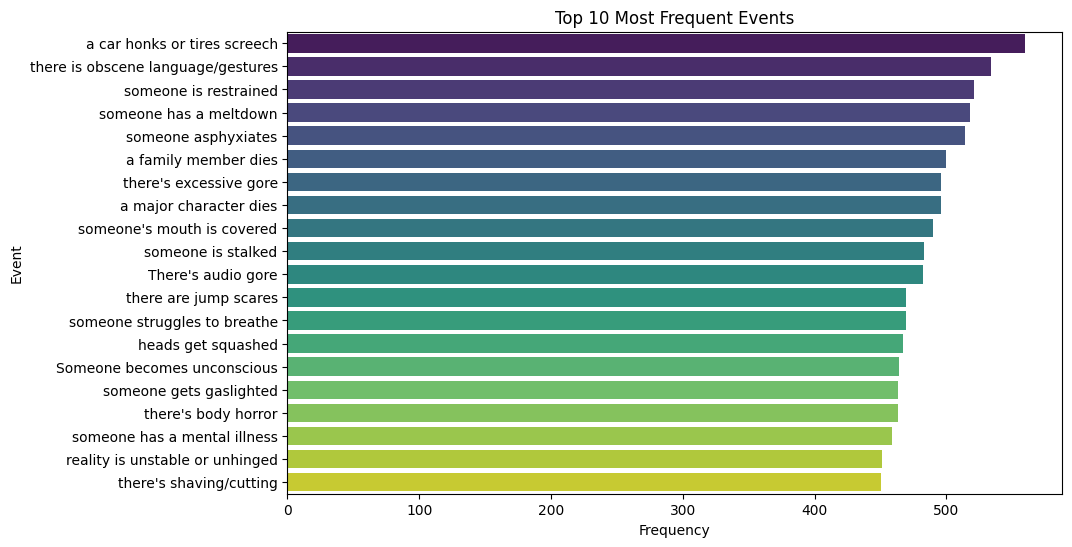

In [ ]:
# Top 10 most frequent events
top_events = event_stats.head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_events.values, y=top_events.index, palette='viridis')
plt.title('Top 20 Most Frequent Events')
plt.xlabel('Frequency')
plt.ylabel('Event')
plt.show()


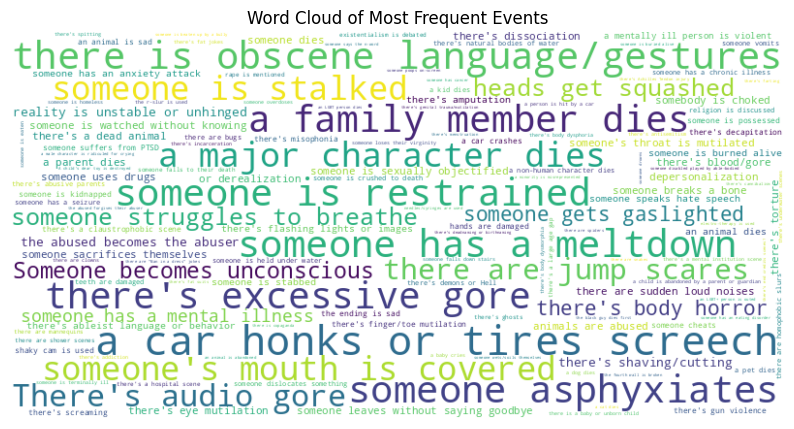

In [ ]:

# # Create a word cloud for the most frequent events
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(event_stats)

# # Plot the word cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.title('Word Cloud of Most Frequent Events')
# plt.axis('off')
# plt.show()

In [74]:
combined_df.head()

,clean_title,events,title_id,original_title,year,runtime,genre,rating,votes
0,john wick,"a dog dies, there's a dead animal, a pet dies,...",tt2911666,john wick,2014,101.0,"action, crime, thriller",7.4,761697
1,hereditary,"a dog dies, there's a dead animal, there are b...",tt7784604,hereditary,2018,127.0,"drama, horror, mystery",7.3,403022
2,megan,"a dog dies, there's a dead animal, there are b...",tt15847548,megan,2022,NaN,comedy,NaN,0
3,the babadook,"a dog dies, there are bugs, a pet dies, animal...",tt2321549,the babadook,2014,94.0,"drama, horror, mystery",6.8,256186
4,a dogs purpose,"a dog dies, a cat dies",tt1753383,a dogs purpose,2017,100.0,"adventure, comedy, drama",7.2,81411


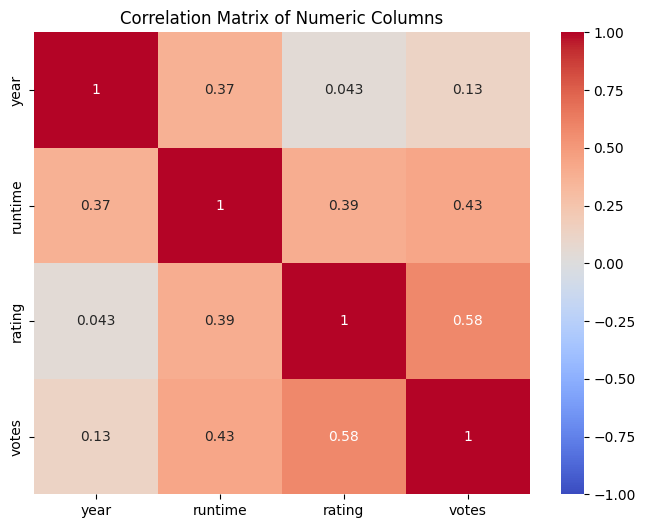

In [75]:
# Select numeric columns for correlation
numeric_columns = ['year', 'runtime', 'rating', 'votes']

# Calculate the correlation matrix
correlation_matrix = combined_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

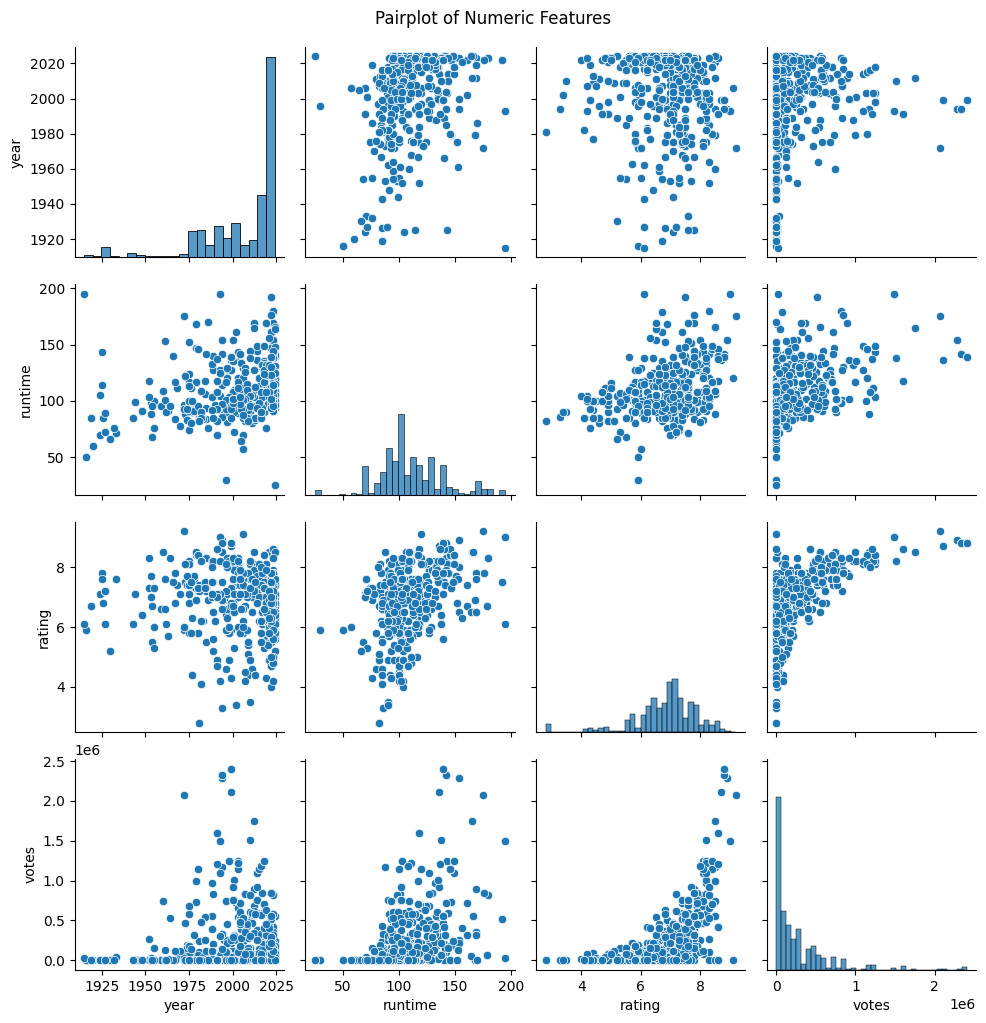

In [ ]:
# Create a pairplot to visualize relationships between numeric columns
sns.pairplot(combined_df[numeric_columns])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

/tmp/ipykernel_50231/1693025225.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating_avg.values, y=genre_rating_avg.index, palette='viridis')


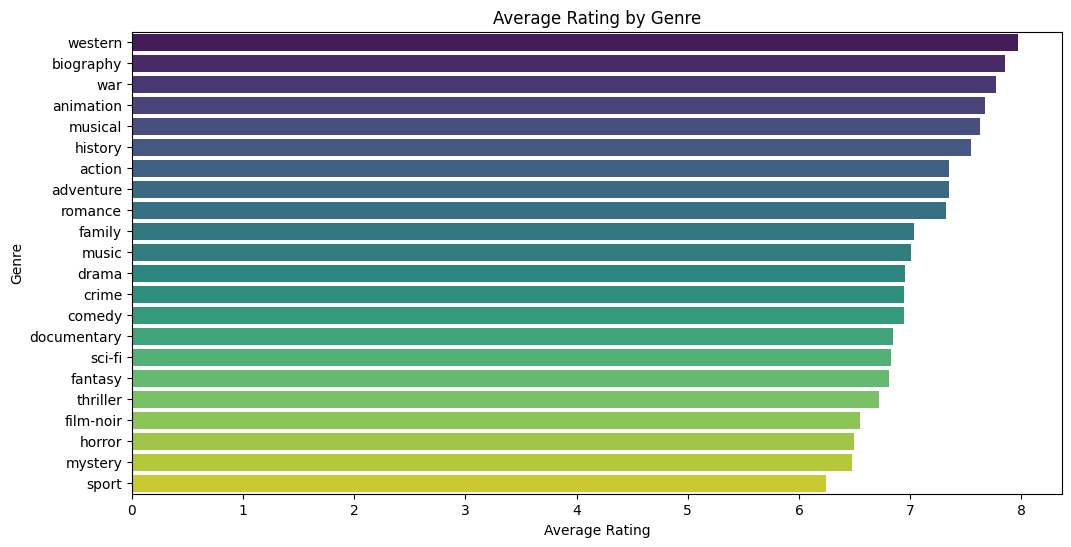

In [ ]:
# Split the 'genre' column into individual genres
combined_df['genre_list'] = combined_df['genre'].str.split(',')

# Explode the genre list to get a row per genre
exploded_genre_df = combined_df.explode('genre_list')

# Strip any leading or trailing spaces from genre names
exploded_genre_df['genre_list'] = exploded_genre_df['genre_list'].str.strip()

# Calculate the average rating per genre
genre_rating_avg = exploded_genre_df.groupby('genre_list')['rating'].mean().sort_values(ascending=False)

# Plot a bar chart of average ratings by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_rating_avg.values, y=genre_rating_avg.index, palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

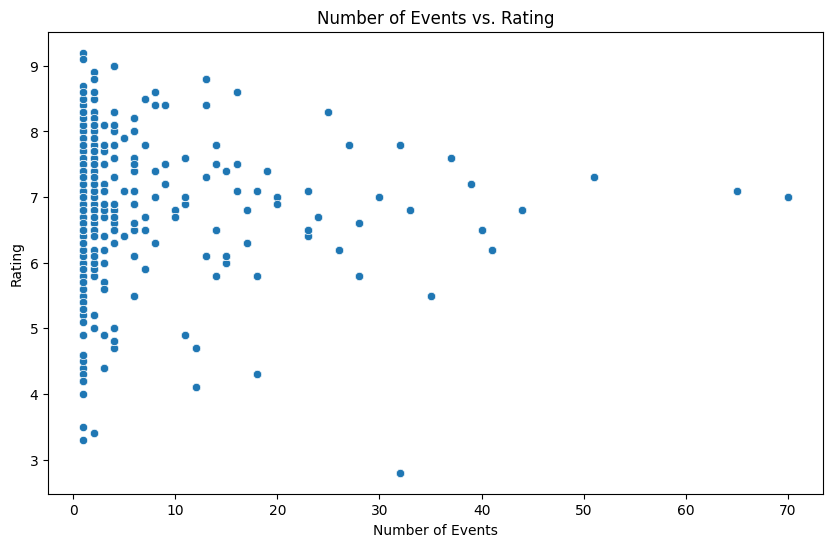

In [ ]:
# Count the number of events for each movie (number of commas + 1)
combined_df['num_events'] = combined_df['events'].str.split(',').apply(len)

# Plot the relationship between the number of events and the rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['num_events'], y=combined_df['rating'])
plt.title('Number of Events vs. Rating')
plt.xlabel('Number of Events')
plt.ylabel('Rating')
plt.show()

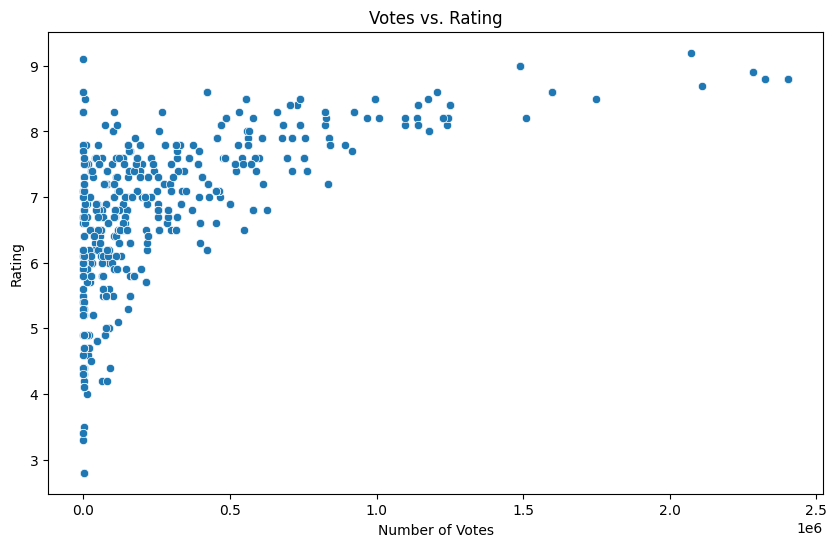

In [ ]:
# Scatter plot of votes vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_df['votes'], y=combined_df['rating'])
plt.title('Votes vs. Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()